<a href="https://colab.research.google.com/github/Zoro114/mne/blob/main/Filtering_and_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mne
import numpy as np


In [ ]:
data_path=mne.datasets.sample.data_path()
raw_fname=data_path+"/MEG/sample/sample_audvis_raw.fif"
raw_proj=data_path+"/MEG/sample/sample_audvis_eog_proj.fif"
raw=mne.io.read_raw_fif(raw_fname,preload=True)
tmin,tmax=0,20

Opening raw data file /root/mne_data/MNE-sample-data//MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<ipython-input-36-85c7537b8aaf>:2: DeprecationWarning: data_path functions now return pathlib.Path objects which do not natively support the plus (+) operator, switch to using forward slash (/) instead. Support for plus will be removed in 1.2.
  raw_fname=data_path+"/MEG/sample/sample_audvis_raw.fif"
<ipython-input-36-85c7537b8aaf>:3: DeprecationWarning: data_path functions now return pathlib.Path objects which do not natively support the plus (+) operator, switch to using forward slash (/) instead. Support for plus will be removed in 1.2.
  raw_proj=data_path+"/MEG/sample/sample_audvis_eog_proj.fif"


In [ ]:
raw.crop(tmin,tmax).load_data()

<Raw | sample_audvis_raw.fif, 376 x 12013 (20.0 s), ~37.8 MB, data loaded>

In [ ]:
fmin,fmax=0,300
nfft=2048
raw.info['bads']

['MEG 2443', 'EEG 053']

In [ ]:
selection=mne.read_vectorview_selection('Left-temporal')
picks=mne.pick_types(raw.info,meg='mag',eeg=False,exclude=raw.info['bads'],selection=selection)

Effective window size : 3.410 (s)


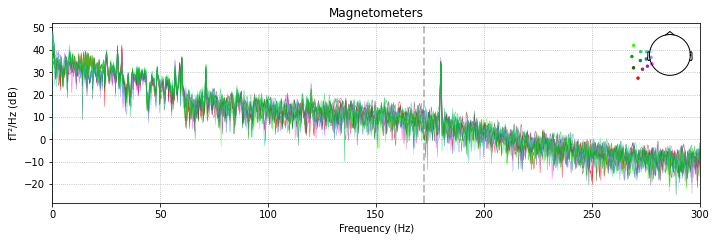

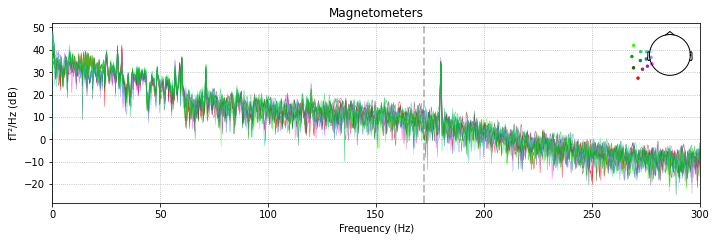

In [ ]:
raw.plot_psd(area_mode='range',tmax=10,picks=picks,average=False)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3965 samples (6.602 sec)

Effective window size : 3.410 (s)


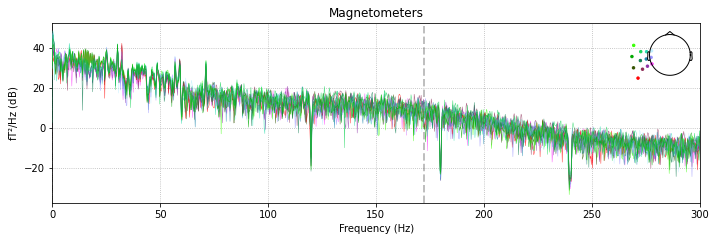

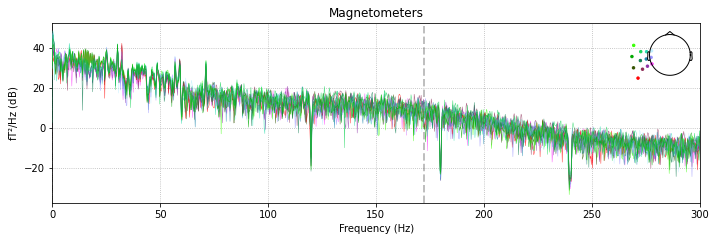

In [ ]:
#Notch Filter
raw.notch_filter(np.arange(60,250,60),picks=picks)
raw.plot_psd(area_mode='range',tmax=10,picks=picks,average=False)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 159 samples (0.265 sec)

Effective window size : 3.410 (s)


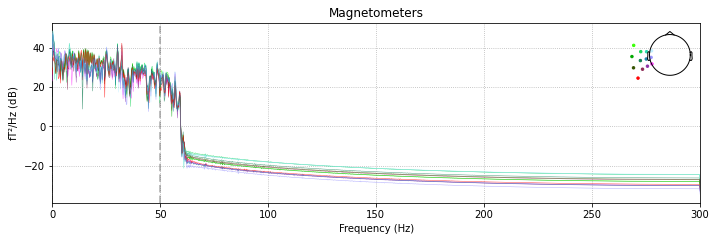

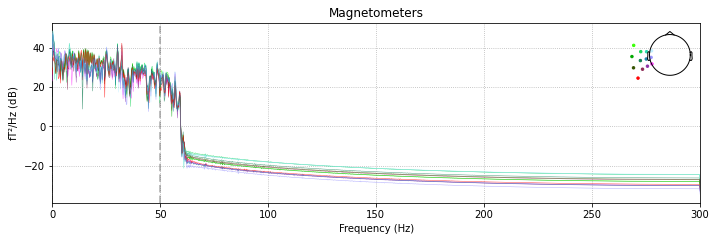

In [ ]:
#low pass filter
raw.filter(None,50)
raw.plot_psd(area_mode='range',tmax=10,picks=picks,average=False)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Filter length: 793 samples (1.320 sec)

Effective window size : 3.410 (s)


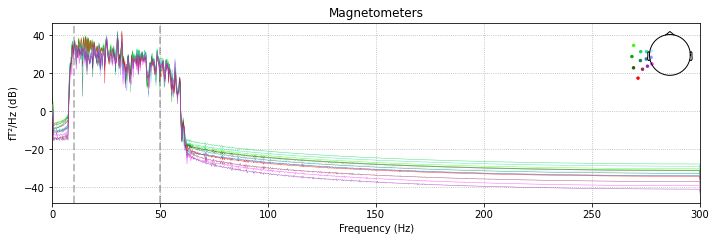

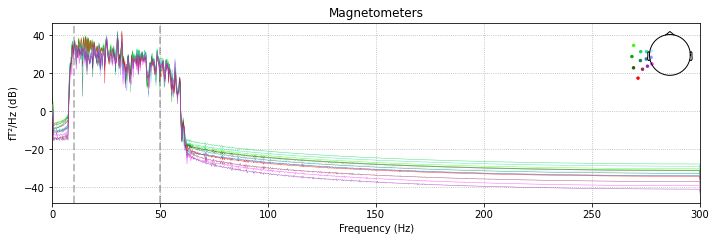

In [ ]:
#high pass filter
raw.filter(10,None)
raw.plot_psd(area_mode='range',tmax=10,picks=picks,average=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 10 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 793 samples (1.320 sec)

Effective window size : 3.410 (s)


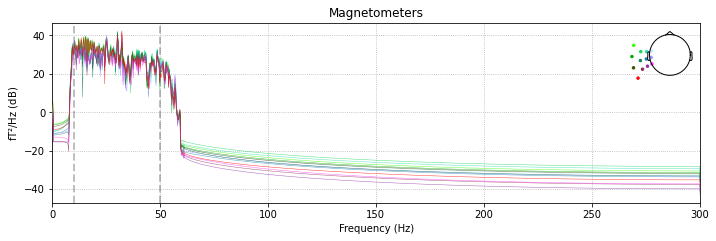

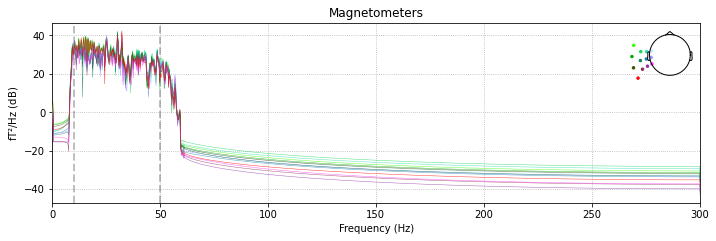

In [ ]:
#low and high pass filter
raw.filter(10,50)
raw.plot_psd(area_mode='range',tmax=10,picks=picks,average=False)


25 events found
Event IDs: [ 1  2  3  4  5 32]
25 events found
Event IDs: [ 1  2  3  4  5 32]
Effective window size : 10.010 (s)


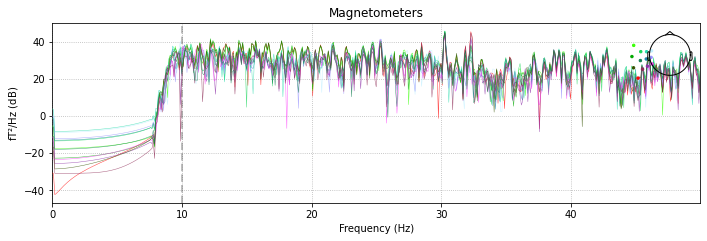

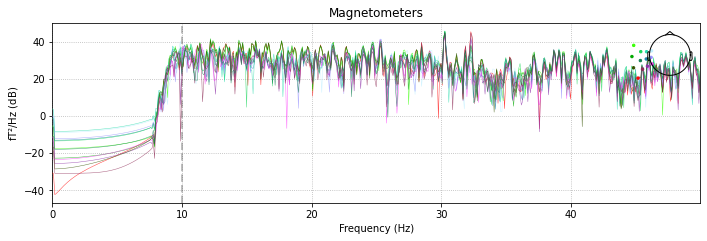

In [ ]:
raw.resample(100,npad='auto')
raw.plot_psd(area_mode='range',tmax=10,picks=picks,average=False)